In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from imblearn.combine import SMOTEENN, SMOTETomek
import warnings
warnings.filterwarnings('ignore')


Load Data

In [49]:
df = pd.read_csv("asthma_disease_data.csv")


In [50]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


EDA

In [51]:
df.shape

(2392, 29)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [53]:
missing = df.isnull().sum()
print(missing)

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64


In [54]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


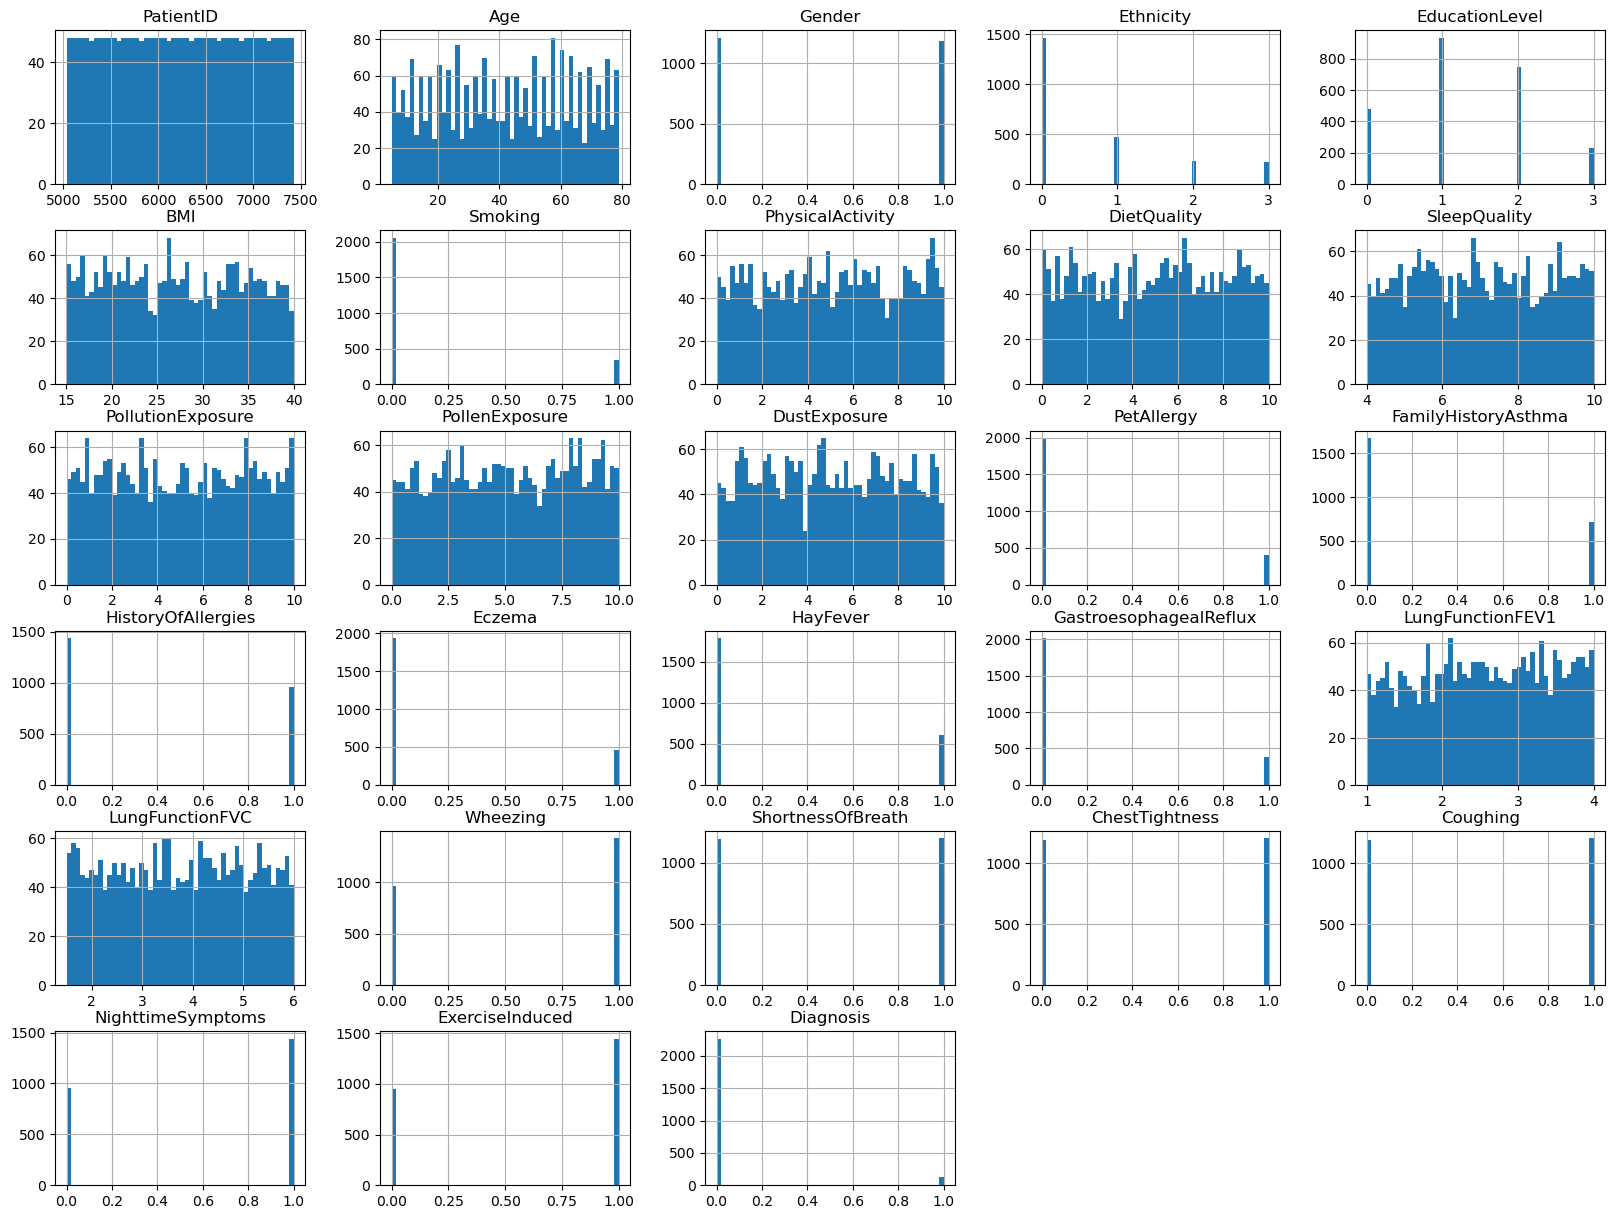

In [55]:
df.hist(bins =50, figsize =(20,15))
plt.show()

Preparing Data

In [56]:
#Drop irrelevant columns
drop_cols = [col for col in ["PatientID", "DoctorInCharge"] if col in df.columns]
df = df.drop(columns=drop_cols)

In [57]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [58]:
print("Dataset shape:", df.shape)
print("Class distribution:\n", df["Diagnosis"].value_counts())

Dataset shape: (2392, 27)
Class distribution:
 Diagnosis
0    2268
1     124
Name: count, dtype: int64


In [59]:
#Drop Target column
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

In [60]:
#Train-Test Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state =42)

In [61]:
#Balance Data with SMOTE
smote = SMOTE(random_state =42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [62]:
print("Train distribution(before SMOTE):", Counter(y_train))
print("Resampled class distribution(after SMOTE):", Counter(y_train_res))

Train distribution(before SMOTE): Counter({0: 1814, 1: 99})
Resampled class distribution(after SMOTE): Counter({0: 1814, 1: 1814})


In [63]:
#Standardize Features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train_res)
X_test_scaled= scalar.transform(X_test)

In [64]:
#Define models & parameter for Logistic Regression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_params ={
    'C': [0.01, 0.1, 1, 10],
    'penalty':['l2'],
    'solver':['lbfgs']
}
grid_log = GridSearchCV(log_reg, log_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_log.fit(X_train_scaled, y_train_res)
best_log = grid_log.best_estimator_
print("Best Logistic ROC-AUC (CV):", grid_log.best_score_, "\nParams:", grid_log.best_params_)


Best Logistic ROC-AUC (CV): 0.9100728971162451 
Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [65]:
#Define models & parameter for Random Forest

rf = RandomForestClassifier(random_state= 42)
rf_params ={
    'n_estimators':[100,200], 
    'max_depth':[None, 10,20],
    'min_samples_split':[2,5]
}

grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)
best_rf = grid_rf.best_estimator_
print("Best RF ROC-AUC (CV):", grid_rf.best_score_, "\nParams:", grid_rf.best_params_)

Best RF ROC-AUC (CV): 0.9888688387333116 
Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [66]:
#Define models & parameter for XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=18,random_state=42)
xgb_params = {
    'n_estimators':[100,200], 
    'max_depth':[3,6],
    'learning_rate':[0.01,0.1],
    'subsample':[0.8,1.0]
}

grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res)
best_xgb = grid_xgb.best_estimator_
print("Best XGB ROC-AUC (CV):", grid_xgb.best_score_, "\nParams:", grid_xgb.best_params_)

Best XGB ROC-AUC (CV): 0.9924934599050766 
Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [67]:
# Predict probabilities and apply threshold = 0.3
def pred_threshold(model, X, threshold=0.3):
    y_scores = model.predict_proba(X)[:, 1]
    return (y_scores >= threshold).astype(int), y_scores

log_pred, log_prob = pred_threshold(best_log, X_test_scaled)
rf_pred, rf_prob = pred_threshold(best_rf, X_test)
xgb_pred, xgb_prob = pred_threshold(best_xgb, X_test)

print("Predictions ready.")

Predictions ready.


In [68]:
# Confusion matrices and ROC/PR plots
models = {"Logistic Regression": (log_pred, log_prob),
          "Random Forest": (rf_pred, rf_prob),
          "XGBoost": (xgb_pred, xgb_prob)}

for name, (ypred, yprob) in models.items():
    print(f"\n{name}")
    cm = confusion_matrix(y_test, ypred)
    print("Confusion matrix:\n", cm)
    print(classification_report(y_test, ypred, digits=3))
    print("ROC-AUC:", roc_auc_score(y_test, yprob))


Logistic Regression
Confusion matrix:
 [[309 145]
 [ 11  14]]
              precision    recall  f1-score   support

           0      0.966     0.681     0.798       454
           1      0.088     0.560     0.152        25

    accuracy                          0.674       479
   macro avg      0.527     0.620     0.475       479
weighted avg      0.920     0.674     0.765       479

ROC-AUC: 0.6741850220264318

Random Forest
Confusion matrix:
 [[399  55]
 [ 20   5]]
              precision    recall  f1-score   support

           0      0.952     0.879     0.914       454
           1      0.083     0.200     0.118        25

    accuracy                          0.843       479
   macro avg      0.518     0.539     0.516       479
weighted avg      0.907     0.843     0.873       479

ROC-AUC: 0.6351101321585904

XGBoost
Confusion matrix:
 [[405  49]
 [ 21   4]]
              precision    recall  f1-score   support

           0      0.951     0.892     0.920       454
          

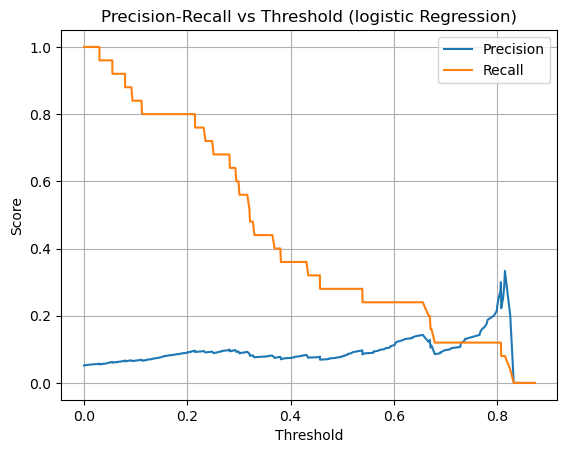

In [69]:
#Precision-Recall Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, log_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

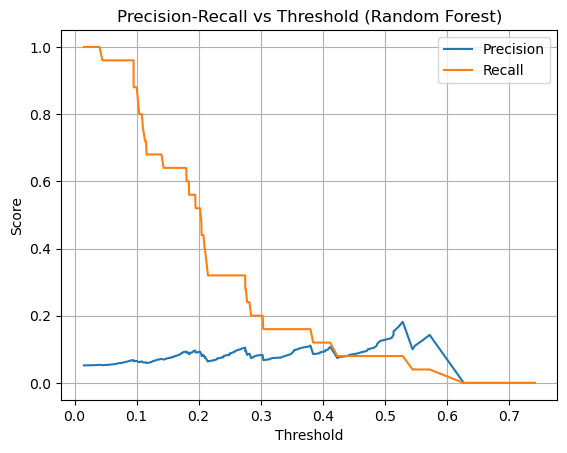

In [70]:
# Precision-Recall Curve for Random Forest
precision, recall, thresholds = precision_recall_curve(y_test, rf_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

Top 15 Features:
BMI                   0.059742
Age                   0.058027
PollenExposure        0.054995
HistoryOfAllergies    0.053834
Eczema                0.053715
ChestTightness        0.052964
DustExposure          0.052060
LungFunctionFEV1      0.051393
DietQuality           0.048659
NighttimeSymptoms     0.045949
HayFever              0.045891
LungFunctionFVC       0.045283
PhysicalActivity      0.044814
PollutionExposure     0.043466
SleepQuality          0.042373
dtype: float64


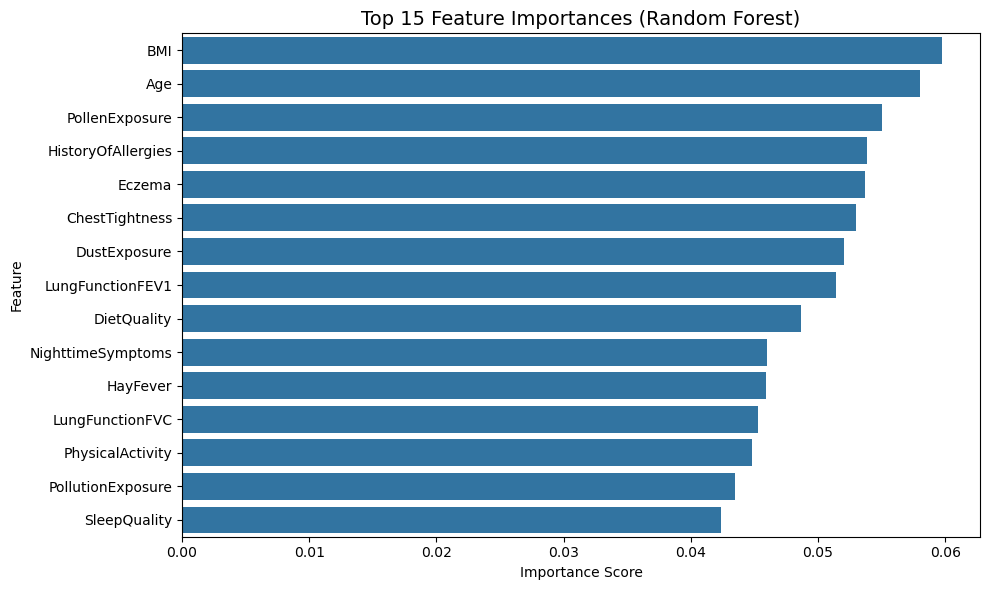

In [71]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_15_features = feature_importances.head(15)
print("Top 15 Features:")
print(top_15_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features.values, y=top_15_features.index)
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Balance data using SMOTEEN(combining oversampling and undersampling)

In [72]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify= y, random_state=42)

In [73]:
smoteen = SMOTEENN(random_state=42)
X_train_balance, y_train_balance = smoteen.fit_resample(X_train, y_train)

In [74]:
print("Training data before SMOTEEN: ", Counter(y_train))
print("Balance class distribution after SMOTEEN: ", Counter(y_train_balance))

Training data before SMOTEEN:  Counter({0: 1814, 1: 99})
Balance class distribution after SMOTEEN:  Counter({1: 1811, 0: 1104})


In [75]:
#Standardize Feature
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform (X_train_balance)
X_test_scaled = scalar.transform(X_test)

In [76]:
log_reg = LogisticRegression(max_iter = 1000, random_state=42)
log_params = {
    'C': [0.01, 0.1,1, 10],
    'penalty':['l2'],
    'solver': ['lbfgs']
}
grid_log = GridSearchCV(log_reg, log_params, cv = 5, scoring='roc_auc', n_jobs= -1)
grid_log.fit(X_train_scaled, y_train_balance)
best_log = grid_log.best_estimator_
print("Best Logistic Regression ROC-AUC(CV):", grid_log.best_score_, "\nParameters:", grid_log.best_params_)

Best Logistic Regression ROC-AUC(CV): 0.9141074431441243 
Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [77]:
random_forest = RandomForestClassifier(random_state=42)
random_forest_params = {
    'n_estimators':[100, 200],
    'max_depth':[None, 10,20],
    'min_samples_split':[2, 5]
}
grid_random_forest= GridSearchCV(random_forest, random_forest_params, cv = 5, scoring = 'roc_auc', n_jobs=-1)
grid_random_forest.fit(X_train_balance, y_train_balance)
best_random_forest = grid_random_forest.best_estimator_
print("Best Random Forest ROC-AUV(CV):", grid_random_forest.best_score_, "\nParameters:", grid_random_forest.best_params_)

Best Random Forest ROC-AUV(CV): 0.9884236215532127 
Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [78]:
#Define models & parameter for XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=18,random_state=42)
xgb_params = {
    'n_estimators':[100,200], 
    'max_depth':[3,6],
    'learning_rate':[0.01,0.1],
    'subsample':[0.8,1.0]
}

grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train_balance, y_train_balance)
best_xgb = grid_xgb.best_estimator_
print("Best XGB ROC-AUC (CV):", grid_xgb.best_score_, "\nParams:", grid_xgb.best_params_)

Best XGB ROC-AUC (CV): 0.9934525970058863 
Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [79]:
#Predict probabilities, apply threshold =0.3
def apply_threshold(model, X, thresholds=0.3):
    prob_y_scores = model.predict_proba(X)[:, 1]
    pred = (prob_y_scores >= thresholds).astype(int)
    return pred, prob_y_scores

log_pred, log_prob = apply_threshold(best_log, X_test_scaled)
random_forest_pred, random_forest_prob = apply_threshold(best_random_forest, X_test)
xgb_class_pred, xgb_class_prob = apply_threshold(best_xgb, X_test)

In [80]:
#to check it returns binary values or not
print("Logistic:", set(log_pred))
print("Random Forest:", set(random_forest_pred))
print("XGBoost:", set(xgb_class_pred))

Logistic: {np.int64(0), np.int64(1)}
Random Forest: {np.int64(0), np.int64(1)}
XGBoost: {np.int64(0), np.int64(1)}


In [81]:
#Evaluation of models
models = {"Logistic Regression": (log_pred, log_prob),
          "Random Forest": (random_forest_pred, random_forest_prob),
          "XGBClassifier": (xgb_class_pred, xgb_class_prob)
          }
for name, (ypred, yprob) in models.items():
    print(f"\n{name}")
    conmatrix= confusion_matrix(y_test,ypred)
    print("Confusion Matrix:\n", conmatrix)
    print(classification_report(y_test, ypred, digits=3))
    print("ROC-AUC:", roc_auc_score(y_test,yprob))


Logistic Regression
Confusion Matrix:
 [[256 198]
 [  5  20]]
              precision    recall  f1-score   support

           0      0.981     0.564     0.716       454
           1      0.092     0.800     0.165        25

    accuracy                          0.576       479
   macro avg      0.536     0.682     0.440       479
weighted avg      0.934     0.576     0.687       479

ROC-AUC: 0.6702202643171806

Random Forest
Confusion Matrix:
 [[340 114]
 [ 14  11]]
              precision    recall  f1-score   support

           0      0.960     0.749     0.842       454
           1      0.088     0.440     0.147        25

    accuracy                          0.733       479
   macro avg      0.524     0.594     0.494       479
weighted avg      0.915     0.733     0.805       479

ROC-AUC: 0.6223788546255506

XGBClassifier
Confusion Matrix:
 [[357  97]
 [ 16   9]]
              precision    recall  f1-score   support

           0      0.957     0.786     0.863       454
    

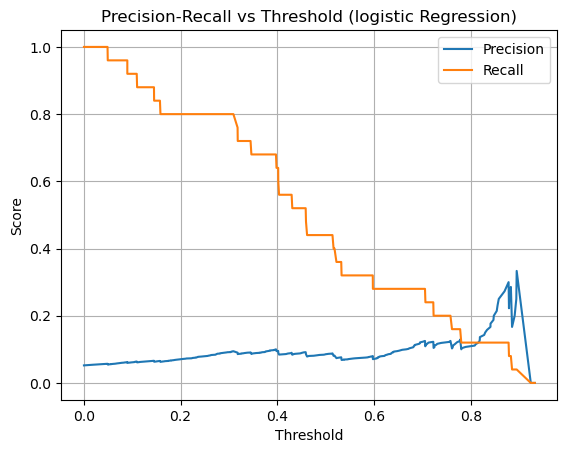

In [82]:
#Precision-Recall Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, log_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

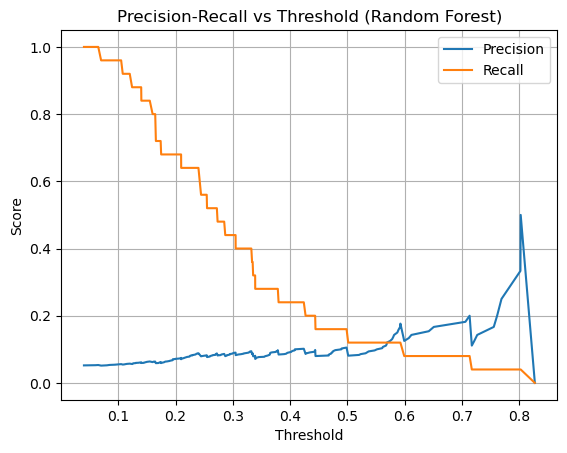

In [83]:
#Precision-Recall Curve for Logistic Random Forest
precision, recall, thresholds = precision_recall_curve(y_test, random_forest_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
#Top 15 features from logistic regression
coefficients = best_log.coef_[0] #binary classification
feature_importance= pd.Series(np.abs(coefficients), index = X.columns)
top_15_features= feature_importance.sort_values(ascending=False).head(15)

print("Top 15 Features:\n",(top_15_features))

Top 15 Features:
 HistoryOfAllergies        0.505171
Eczema                    0.460892
HayFever                  0.420401
NighttimeSymptoms         0.401727
ChestTightness            0.378364
PetAllergy                0.377791
Smoking                   0.358184
Coughing                  0.351945
ShortnessOfBreath         0.329380
FamilyHistoryAsthma       0.314903
GastroesophagealReflux    0.249707
EducationLevel            0.244701
Gender                    0.238216
DustExposure              0.192365
PollenExposure            0.168116
dtype: float64


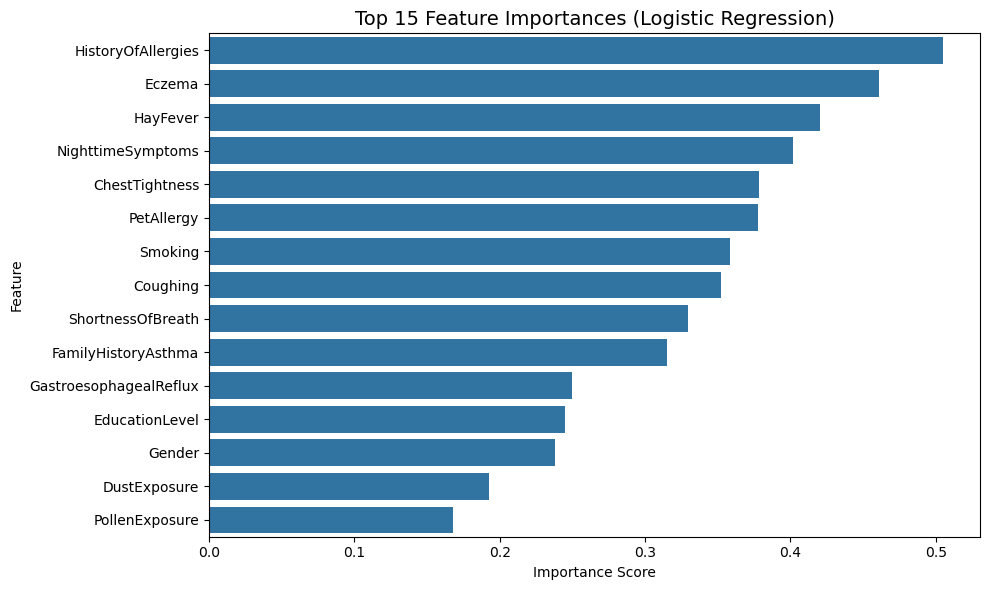

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features.values, y=top_15_features.index)
plt.title("Top 15 Feature Importances (Logistic Regression)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()